### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from matplotlib.pyplot import figure
from math import sqrt


### Load the Data

In [2]:
df=pd.read_csv("appliance_energy_usage.csv")

### EDA

In [3]:
df.head()

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
0,1/11/2016 17:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
1,1/11/2016 17:10,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2,1/11/2016 17:20,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
3,1/11/2016 17:30,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
4,1/11/2016 17:40,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [4]:
df.dtypes

date            object
Appliances       int64
lights           int64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Tdewpoint      float64
Visibility     float64
dtype: object

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Tdewpoint      0
Visibility     0
dtype: int64

In [6]:
df_final=df.loc[:,['date','Appliances']]

In [7]:
df_final.head()

,date,Appliances
0,1/11/2016 17:00,60
1,1/11/2016 17:10,60
2,1/11/2016 17:20,50
3,1/11/2016 17:30,50
4,1/11/2016 17:40,60


In [8]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [9]:
df_final.dtypes

date          datetime64[ns]
Appliances             int64
dtype: object

In [10]:
df_final.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [11]:
df_final=df_final.set_index('date')

In [12]:
df_final.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [13]:
df_final=df_final.resample('1H').mean()

In [14]:
df_final.head()

,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333


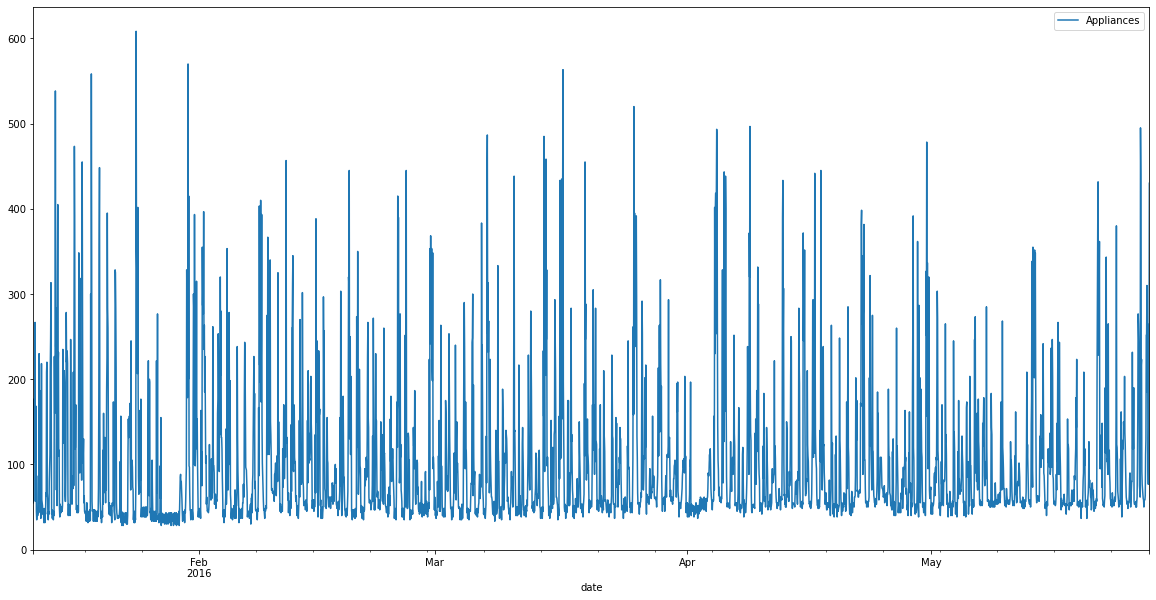

In [15]:
#df_final[0:720].plot(figsize=(20,10))
df_final.plot(figsize=(20,10))
plt.show()

### Null Hypothesis - Series possesses a unit root and hence is not stationary

### Alternate Hypothesis - Series is stationary

In [16]:
def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(df_final['Appliances'])

ADF Test Statistic : -8.948888280256897
p-value : 8.833753129593984e-15
#Lags Used : 29
Number of Observations Used : 3260
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
print("Length of the dataset is {} Rows".format(len(df_final['Appliances'])))

Length of the dataset is 3290 Rows


In [19]:
X = df_final.values
train = X[0:3200] # 3200 data as train data
test  = X[3200:3290]  # 90 data as test data
predictions = []

print('Full Data Size     :',X.size)
print('Training Data Size :',train.size)
print('Testing Data Size  :',test.size)

Full Data Size     : 3290
Training Data Size : 3200
Testing Data Size  : 90


### Plot ACF

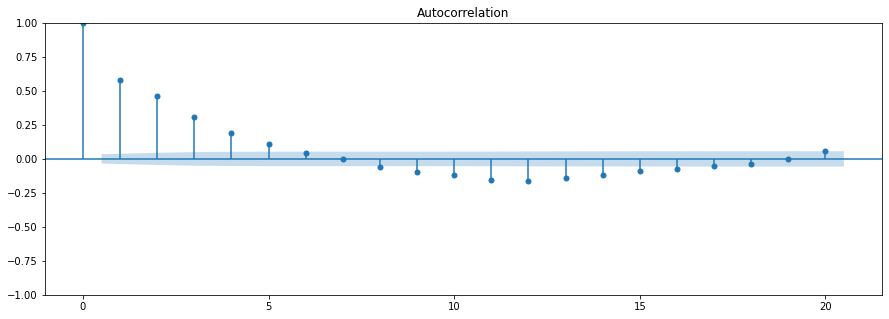

In [20]:
plt.rc("figure", figsize=(15,5))
plot_acf(df_final[0:3200],lags=20)
plt.show()

### Plot PACF

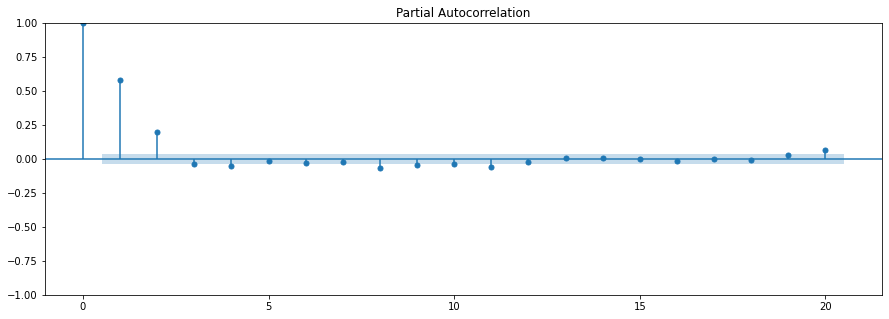

In [21]:
plt.rc("figure", figsize=(15,5))
plot_pacf(df_final[0:3200], lags=20,method='ywm')
plt.show()

In [22]:
#p,d,q  
#p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(11,0,5))
model_arima_fit = model_arima.fit()


C:\Users\AKU493\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
print(model_arima_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3200
Model:                ARIMA(11, 0, 5)   Log Likelihood              -17787.023
Date:                Thu, 20 Oct 2022   AIC                          35610.046
Time:                        19:23:25   BIC                          35719.322
Sample:                             0   HQIC                         35649.224
                               - 3200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2031      5.185     18.747      0.000      87.041     107.365
ar.L1         -0.4357      0.097     -4.481      0.000      -0.626      -0.245
ar.L2          2.2125      0.054     41.327      0.0

In [24]:
# #p,d,q  
# #p = periods taken for autoregressive model
# #d -> Integrated order, difference
# # q periods in moving average model
# model_arima = ARIMA(train,order=(50,0,50))
# model_arima_fit = model_arima.fit()

In [25]:
# print(model_arima_fit.summary())  

In [26]:
# grid search ARIMA parameters for time series


# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	train_size = int(len(X) * 0.80)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		model = ARIMA(history, order=arima_order)
# 		model_fit = model.fit()
# 		yhat = model_fit.forecast()[0]
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	rmse = sqrt(mean_squared_error(test, predictions))
# 	return rmse
#  # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					rmse = evaluate_arima_model(dataset, order)
# 					if rmse < best_score:
# 						best_score, best_cfg = rmse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,rmse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [27]:
# # evaluate parameters
# p_values = [1,2] 
# d_values = range(0, 1)
# q_values = [1,2]#range(0, 3)

# evaluate_models(df_final['Appliances'], p_values, d_values, q_values)

In [28]:
predict = model_arima_fit.get_prediction(start=len(train),end=len(train) + 89)

predictions=predict.predicted_mean

In [29]:
predictions=pd.DataFrame(predictions,columns=['Predicted'])
predictions.head()

,Predicted
0,49.207286
1,56.974923
2,54.277699
3,63.856030
4,66.210337


In [30]:
test_data=pd.DataFrame(test,columns=['Appliances'])

In [31]:
test_data.head(10)

,Appliances
0,56.666667
1,55.000000
2,53.333333
3,53.333333
4,106.666667
5,71.666667
6,161.666667
7,56.666667
8,38.333333
9,66.666667


<AxesSubplot:>

<Figure size 2016x504 with 0 Axes>

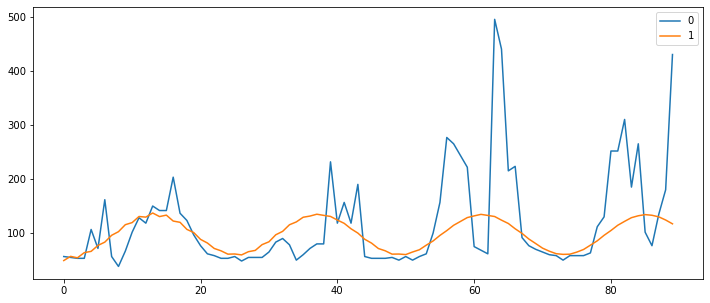

In [32]:
test_vs_pred=pd.concat([test_data['Appliances'],predictions['Predicted']],axis=1,ignore_index=True)

plt.figure(figsize=(28,7))
fig = plt.figure(1)

test_vs_pred.plot(figsize=(12,5))

In [33]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print("RMSE :",rmse)

RMSE : 83.1934047346784


In [34]:
test_vs_pred.rename({0:'Actual',1:'Predicted'},inplace=True,axis=1)

In [35]:
test_vs_pred.head(10)

,Actual,Predicted
0,56.666667,49.207286
1,55.000000,56.974923
2,53.333333,54.277699
3,53.333333,63.856030
4,106.666667,66.210337
5,71.666667,77.179582
6,161.666667,83.256092
7,56.666667,95.932902
8,38.333333,102.589173
9,66.666667,115.502268
